# Exploring CNR's data

Notebook to take a look at the data, prior to any work. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/X_train_v2.csv')

In [3]:
df.head()

,ID,WF,Time,NWP1_00h_D-2_U,NWP1_00h_D-2_V,NWP1_00h_D-2_T,NWP1_06h_D-2_U,NWP1_06h_D-2_V,NWP1_06h_D-2_T,NWP1_12h_D-2_U,...,NWP4_00h_D-1_CLCT,NWP4_12h_D-1_U,NWP4_12h_D-1_V,NWP4_12h_D-1_CLCT,NWP4_00h_D_U,NWP4_00h_D_V,NWP4_00h_D_CLCT,NWP4_12h_D_U,NWP4_12h_D_V,NWP4_12h_D_CLCT
0,1,WF1,01/05/2018 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.254603,-0.289687,82.543144,NaN,NaN,NaN
1,2,WF1,01/05/2018 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.490908,-0.413370,99.990844,NaN,NaN,NaN
2,3,WF1,01/05/2018 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.997093,-1.415138,98.367235,NaN,NaN,NaN
3,4,WF1,01/05/2018 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.689598,-0.961441,94.860604,NaN,NaN,NaN
4,5,WF1,01/05/2018 05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.290994,-0.294963,95.905879,NaN,NaN,NaN


## Global information

There is quite a lot going in this part: mainly, we go from the above array with a more comprehensive indexing. That's quite verbose and tiring, but hope it will be useful.

Then, just a call to `head()` and `describe()` methods. 

In [4]:
df = df.set_index('Time')
# Otherwise, the time column is a dumb index column
df.index = pd.to_datetime(df.index)
# Otherwise, dtype=Object=terrible
df['WF'] = df['WF'].astype('category')
df['WF'] = df['WF'].cat.rename_categories(range(1, 7))
df = df.drop('ID', axis=1)

# Special indexing having time AND WF id
index_wf_time = pd.MultiIndex.from_frame(df.reset_index()[['Time', 'WF']])
df = df.set_index(index_wf_time)
df = df.drop('WF', axis=1)

Now, the tricky part: instead of having to deal with these damn string columns format, we use pandas'[MultiIndex feature](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)

In [5]:
multiindex = [tuple(col.split('_')) for col in df.columns]
for i, (nwp, hour, day, var) in enumerate(multiindex):
    multiindex[i] = (int(nwp[-1]), int(hour[:2]), 0 if day=='D' else int(day[1:]), var)
multiindex = pd.MultiIndex.from_tuples(multiindex, names=['NWP', 'h', 'D', 'var'])

In [6]:
df.columns = multiindex

We enjoy the result: 

In [7]:
df.head()

NWP                      1                                      ...    4      \
h                       0           6           12          18  ...   0   12   
D                       -2          -2          -2          -2  ...   -1  -1   
var                      U   V   T   U   V   T   U   V   T   U  ... CLCT   U   
Time                WF                                          ...            
2018-01-05 01:00:00 1  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN   
2018-01-05 02:00:00 1  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN   
2018-01-05 03:00:00 1  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN   
2018-01-05 04:00:00 1  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN   
2018-01-05 05:00:00 1  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN   

NWP                                                                          
h                                      0                        12           
D                                       0                        0           
var                      V CLCT         U         V       CLCT   U   V CLCT  
Time                WF                                                       
2018-01-05 01:00:00 1  NaN  NaN  1.254603 -0.289687  82.543144 NaN NaN  NaN  
2018-01-05 02:00:00 1  NaN  NaN  2.490908 -0.413370  99.990844 NaN NaN  NaN  
2018-01-05 03:00:00 1  NaN  NaN  0.997093 -1.415138  98.367235 NaN NaN  NaN  
2018-01-05 04:00:00 1  NaN  NaN  0.689598 -0.961441  94.860604 NaN NaN  NaN  
2018-01-05 05:00:00 1  NaN  NaN  0.290994 -0.294963  95.905879 NaN NaN  NaN  

[5 rows x 102 columns]

In [8]:
df.describe()

NWP               1                                                          \
h                0                                         6                  
D                -2                                        -2                 
var               U             V             T             U             V   
count  20011.000000  20011.000000  20011.000000  29363.000000  29363.000000   
mean       0.090606     -1.025976    287.088770      0.332591     -1.077218   
std        4.520956      5.992541      7.257293      4.575284      6.042829   
min      -16.093000    -25.500000    267.670000    -20.580000    -26.987000   
25%       -2.921800     -5.035500    281.850000     -2.659650     -5.114250   
50%       -0.125700     -1.642600    287.770000      0.013600     -1.676300   
75%        2.832350      3.108050    292.240000      3.253850      3.119950   
max       19.268000     18.573000    309.340000     19.009000     18.850000   

NWP                                                                          \
h                              12                                        18   
D                              -2                                        -2   
var               T             U             V             T             U   
count  29363.000000  37093.000000  37093.000000  37093.000000  37093.000000   
mean     288.219783      0.394669     -1.200651    288.227481      0.358039   
std        7.720992      4.610188      6.071442      7.690839      4.589781   
min      267.900000    -26.114000    -25.161000    267.740000    -17.658000   
25%      282.570000     -2.658800     -5.272500    282.610000     -2.728000   
50%      288.790000      0.145500     -1.898600    288.850000      0.090800   
75%      293.870000      3.351500      2.972500    293.830000      3.245900   
max      310.130000     19.788000     20.569000    310.460000     20.038000   

NWP    ...             4                                            \
h      ...            0             12                               
D      ...            -1            -1                               
var    ...          CLCT             U             V          CLCT   
count  ...  37093.000000  37237.000000  37237.000000  37237.000000   
mean   ...     54.578974      0.289732     -0.741394     55.209083   
std    ...     42.088786      2.565576      3.506022     41.924869   
min    ...     -0.000027    -10.629497    -16.981629     -0.000025   
25%    ...      1.188699     -1.205145     -2.804116      1.805183   
50%    ...     64.289738     -0.001884     -0.902857     65.936240   
75%    ...     99.826042      1.646418      1.388208     99.855035   
max    ...    100.000000     11.364814     11.711815    100.000000   

NWP                                                                          \
h                0                                         12                 
D                 0                                         0                 
var               U             V          CLCT             U             V   
count  37231.000000  37231.000000  37231.000000  18693.000000  18693.000000   
mean       0.304819     -0.724174     54.973261      0.458783     -0.747684   
std        2.556726      3.506528     42.034132      2.685974      3.683021   
min      -10.397587    -16.789731     -0.000027     -9.348127    -15.936589   
25%       -1.205971     -2.775378      1.456507     -1.191179     -3.088978   
50%        0.013982     -0.889685     65.148853      0.210253     -0.971048   
75%        1.658068      1.419047     99.925229      2.061762      1.681227   
max       11.639425     11.949275    100.000000     11.212995     11.067216   

NWP                  
h                    
D                    
var            CLCT  
count  18693.000000  
mean      54.953988  
std       42.068441  
min       -0.000027  
25%        1.976091  
50%       64.494221  
75%       99.998474  
max      100.000000  

[8 rows x 102 columns]

Accessing values can be done with the `xs` method. E.g, all the temperatures at 0h:

In [9]:
df.xs(('T', 0), level=('var', 'h'), axis=1)

NWP                         1                          3              \
D                          -2      -1       0         -2          -1   
Time                WF                                                 
2018-01-05 01:00:00 1     NaN     NaN  286.44        NaN         NaN   
2018-01-05 02:00:00 1     NaN     NaN  286.26        NaN         NaN   
2018-01-05 03:00:00 1     NaN     NaN  285.75  287.00000  287.000000   
2018-01-05 04:00:00 1     NaN     NaN  284.78        NaN         NaN   
2018-01-05 05:00:00 1     NaN     NaN  284.46        NaN         NaN   
...                       ...     ...     ...        ...         ...   
2019-01-15 20:00:00 6     NaN  274.00  274.34        NaN         NaN   
2019-01-15 21:00:00 6     NaN  273.72  273.71        NaN  275.578857   
2019-01-15 22:00:00 6     NaN  273.41  273.15        NaN         NaN   
2019-01-15 23:00:00 6     NaN  273.04  272.61        NaN         NaN   
2019-01-16 00:00:00 6   272.9  272.07  270.93  275.09436  275.026703   

NWP                                 
D                                0  
Time                WF              
2018-01-05 01:00:00 1          NaN  
2018-01-05 02:00:00 1          NaN  
2018-01-05 03:00:00 1   286.000000  
2018-01-05 04:00:00 1          NaN  
2018-01-05 05:00:00 1          NaN  
...                            ...  
2019-01-15 20:00:00 6          NaN  
2019-01-15 21:00:00 6   275.373444  
2019-01-15 22:00:00 6          NaN  
2019-01-15 23:00:00 6          NaN  
2019-01-16 00:00:00 6   274.628784  

[37375 rows x 6 columns]

## Looking at the temperature

There are, in the end, only 3 variables: 
* Wind speed and directions
* Temperature 
* Cloud cover

The format may be difficult to read at first, so let's look at the temperature first.

Those are the missing values per columns:

In [10]:
print('PROPORTION OF MISSING VALUES PER COLUMN')
df.xs('T', level='var', axis=1).isna().mean()

PROPORTION OF MISSING VALUES PER COLUMN


NWP  h   D 
1    0   -2    0.464589
     6   -2    0.214368
     12  -2    0.007545
     18  -2    0.007545
     0   -1    0.007545
     6   -1    0.003692
     12  -1    0.003692
     18  -1    0.003692
     0    0    0.003853
     6    0    0.249953
     12   0    0.499853
     18   0    0.749886
3    0   -2    0.791625
     6   -2    0.708254
     12  -2    0.666569
     18  -2    0.667692
     0   -1    0.666569
     6   -1    0.666569
     12  -1    0.666729
     18  -1    0.667692
     0    0    0.666569
     6    0    0.749940
     12   0    0.833284
     18   0    0.916950
dtype: float64

### Split Apply Combine

We will make use of the [split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) paradigm: 

In [11]:
wf_group = df.groupby('WF', level=0)

In [12]:
for name, group in wf_group:
    print(name)

1
2
3
4
5
6


First, let's do that on the WF1: 

In [13]:
wf_1 = df.xs(1, level='WF')
wf_1.head()

NWP                   1                                      ...    4          \
h                    0           6           12          18  ...   0   12       
D                    -2          -2          -2          -2  ...   -1  -1       
var                   U   V   T   U   V   T   U   V   T   U  ... CLCT   U   V   
Time                                                         ...                
2018-01-05 01:00:00 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN NaN   
2018-01-05 02:00:00 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN NaN   
2018-01-05 03:00:00 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN NaN   
2018-01-05 04:00:00 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN NaN   
2018-01-05 05:00:00 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN NaN   

NWP                                                                   
h                               0                        12           
D                                0                        0           
var                 CLCT         U         V       CLCT   U   V CLCT  
Time                                                                  
2018-01-05 01:00:00  NaN  1.254603 -0.289687  82.543144 NaN NaN  NaN  
2018-01-05 02:00:00  NaN  2.490908 -0.413370  99.990844 NaN NaN  NaN  
2018-01-05 03:00:00  NaN  0.997093 -1.415138  98.367235 NaN NaN  NaN  
2018-01-05 04:00:00  NaN  0.689598 -0.961441  94.860604 NaN NaN  NaN  
2018-01-05 05:00:00  NaN  0.290994 -0.294963  95.905879 NaN NaN  NaN  

[5 rows x 102 columns]

### Merge predictions

We select the temperature: 

In [14]:
temp_df = wf_1.xs('T', level='var', axis=1)
temp_df.head()

NWP                   1                                          ...      3  \
h                    0   6   12  18  0   6   12  18      0   6   ...     12   
D                    -2  -2  -2  -2  -1  -1  -1  -1       0   0  ...     -2   
Time                                                             ...          
2018-01-05 01:00:00 NaN NaN NaN NaN NaN NaN NaN NaN  286.44 NaN  ...    NaN   
2018-01-05 02:00:00 NaN NaN NaN NaN NaN NaN NaN NaN  286.26 NaN  ...    NaN   
2018-01-05 03:00:00 NaN NaN NaN NaN NaN NaN NaN NaN  285.75 NaN  ...  286.0   
2018-01-05 04:00:00 NaN NaN NaN NaN NaN NaN NaN NaN  284.78 NaN  ...    NaN   
2018-01-05 05:00:00 NaN NaN NaN NaN NaN NaN NaN NaN  284.46 NaN  ...    NaN   

NWP                                                                        
h                       18     0      6      12     18     0   6   12  18  
D                       -2     -1     -1     -1     -1      0   0   0   0  
Time                                                                       
2018-01-05 01:00:00    NaN    NaN    NaN    NaN    NaN    NaN NaN NaN NaN  
2018-01-05 02:00:00    NaN    NaN    NaN    NaN    NaN    NaN NaN NaN NaN  
2018-01-05 03:00:00  287.0  287.0  287.0  287.0  286.0  286.0 NaN NaN NaN  
2018-01-05 04:00:00    NaN    NaN    NaN    NaN    NaN    NaN NaN NaN NaN  
2018-01-05 05:00:00    NaN    NaN    NaN    NaN    NaN    NaN NaN NaN NaN  

[5 rows x 24 columns]

**We merge all models (NWP) and all predictions (D), at every hours (h)**. This gets much simpler:

In [15]:
temp_df_mean = temp_df.mean(axis=1)
temp_df_mean.head()

Time
2018-01-05 01:00:00    286.440
2018-01-05 02:00:00    286.260
2018-01-05 03:00:00    286.575
2018-01-05 04:00:00    284.780
2018-01-05 05:00:00    284.460
dtype: float64

We can plot that daywise: 

In [16]:
# temp_df_day = temp_df.resample('D').mean()
temp_df_day = temp_df_mean.groupby(temp_df_mean.index.date).mean()

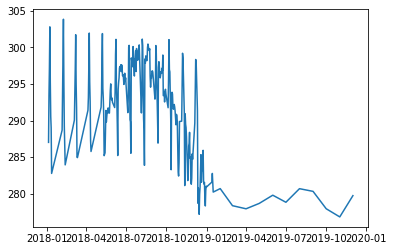

In [18]:
sns.lineplot(data=temp_df_day)

The end of the temperature is wrong; there must be more missing values at the hot hours of the day for July, 2019.

In [48]:
def hourly_missing(dataframe):
    return dataframe.isna().mean(axis=1).groupby(dataframe.index.hour).mean()

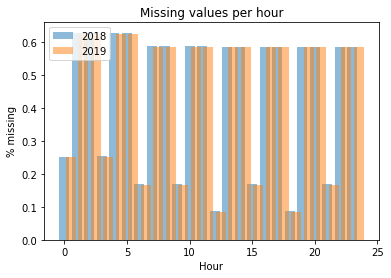

In [55]:
plt.bar(x=np.arange(24), height=hourly_missing(temp_df[temp_df.index.year == 2018]), alpha=.5, label=2018)
plt.bar(x=np.arange(24)+.5, height=hourly_missing(temp_df[temp_df.index.year == 2019]), alpha=.5, label=2019)
plt.title("Missing values per hour")
plt.xlabel('Hour')
plt.ylabel('% missing')
plt.legend()

It seems not...

### Comparing the two providers

This is done with:

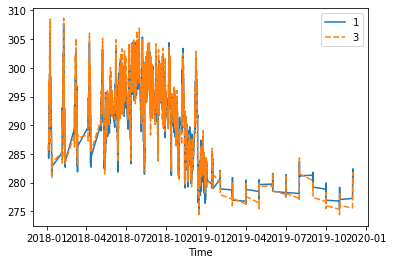

In [28]:
sns.lineplot(data=temp_df.mean(level='NWP', axis=1))

The two are fairly concordant.

### Comparing D-2 D-1 D prediction

This is done with:

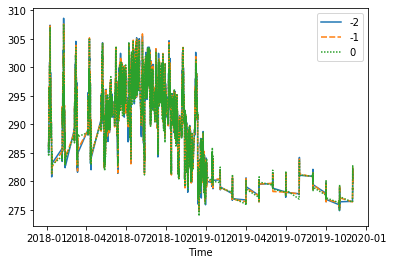

In [63]:
sns.lineplot(data=temp_df.mean(level='D', axis=1))

### Keeping Temperature only : all windfarms

Let's plot it for all windfarms. 

In [71]:
#TODO: To update

Text(0, 0.5, 'T°')

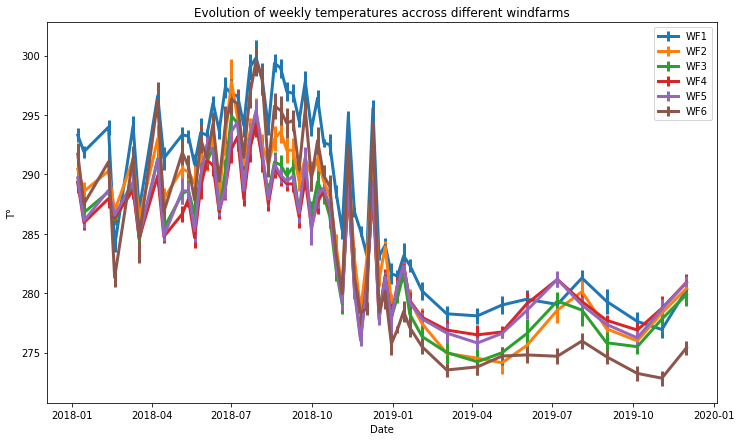

In [51]:
fig, ax = plt.subplots(figsize=(12, 7))

for wf, data in result.items():
    ax.errorbar(x=data.index, y=data.mean(axis=1), yerr=data.std(axis=1), lw=3, label='%s'%wf)
ax.legend()
ax.set_title('Evolution of weekly temperatures accross different windfarms')
ax.set_xlabel('Date')
ax.set_ylabel('T°')

Not such a big change accross WF...

## Looking at the cloud cover

We simply do the same with the cloud cover metric. Note that only Prediction model 4 gives this metric. 

In [54]:
result = {}
for wf in range(1, 7):
    # Taking the good WF
    CLCT_df = df[df.loc[:, 'WF']=='WF%d'%wf]
    # Focusing on temperature
    CLCT_df = CLCT_df.loc[:, [col for col in CLCT_df.columns if col.endswith('_CLCT') or col=='Time']]
    # Getting rid of D-1 predictions
    CLCT_df = CLCT_df.loc[:, [col for col in CLCT_df.columns if col.endswith('D_CLCT')]]
    # Resampling to average over weeks
    CLCT_df_week = CLCT_df.resample('W').mean()
    # Getting rid of NA values
    CLCT_df_week = CLCT_df_week.dropna()
    # Storing the result
    result['WF%d'%wf] = CLCT_df_week

Text(0, 0.5, '%')

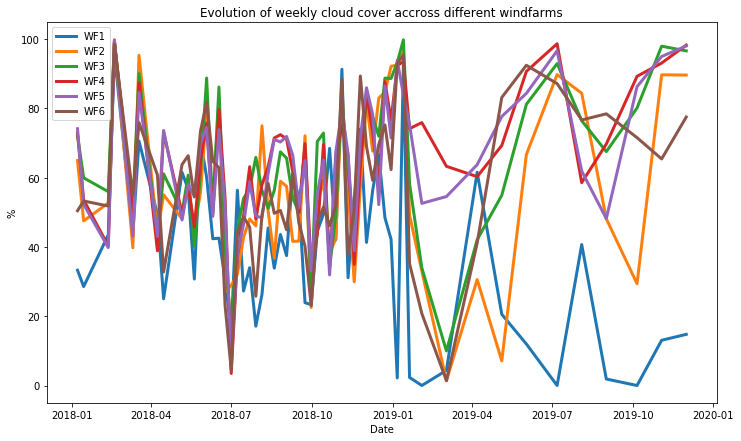

In [57]:
fig, ax = plt.subplots(figsize=(12, 7))

for wf, data in result.items():
    ax.plot(data.index, data.mean(axis=1), lw=3, label='%s'%wf)
ax.legend()
ax.set_title('Evolution of weekly cloud cover accross different windfarms')
ax.set_xlabel('Date')
ax.set_ylabel('%')